# pallindrome partitioning 2 problem  question with example:
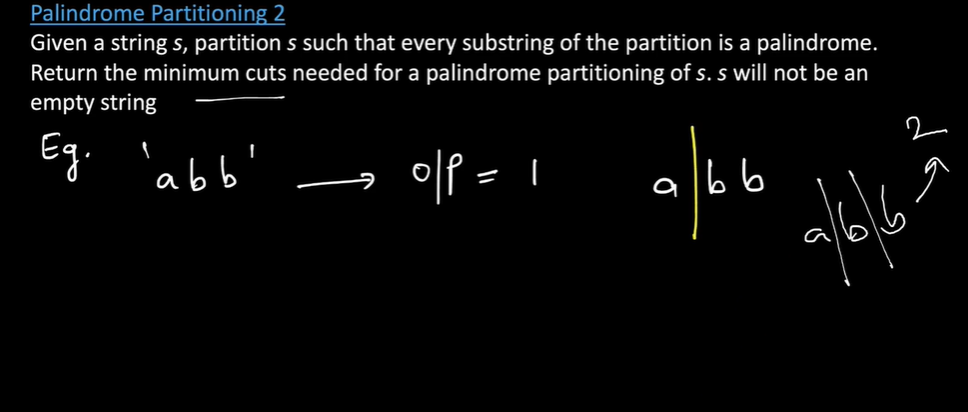

# pallindrome partitioning 2 problem Clarifying ques:
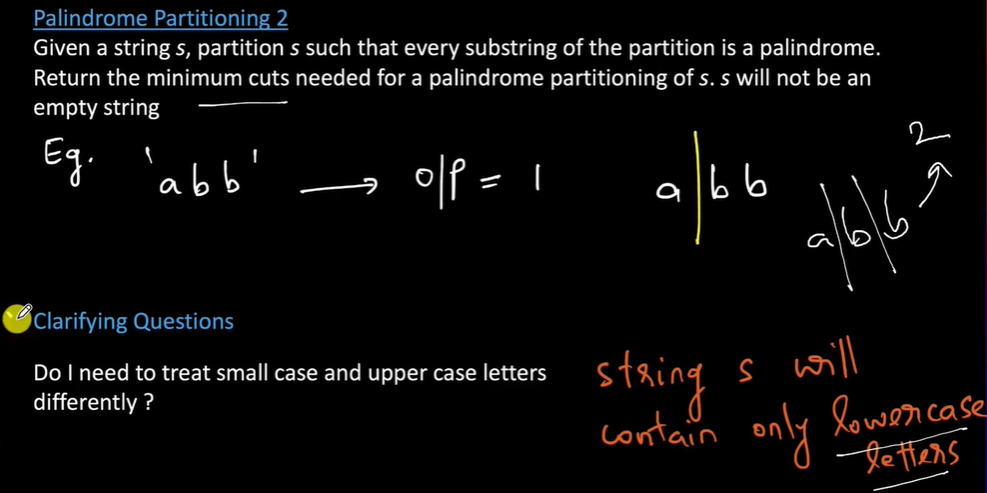
# pallindrome partitioning 2 problem  test-cases:
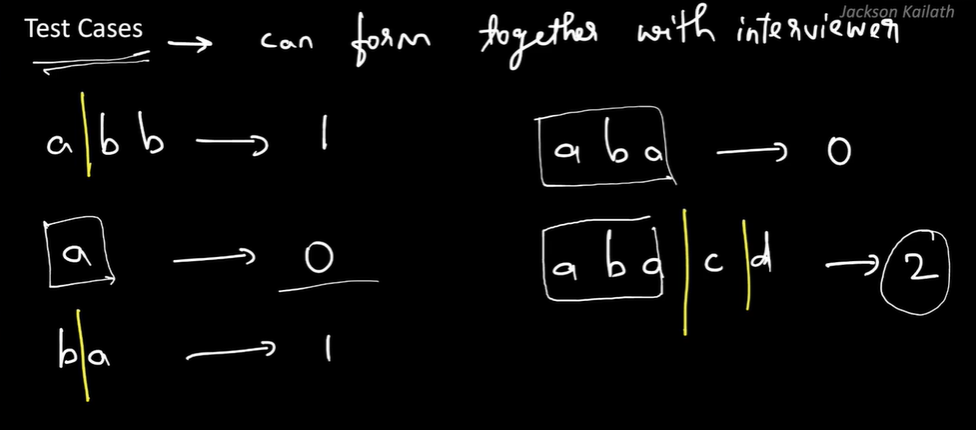
# pallindrome partitioning 2 problem-statement:
### Coding Exercise: Palindrom Partitioning 2 ( Min Cuts)
### Palindrom Partitioning 2 : Given a string s, partition s such that every substring of the partition is a palindrome.
### Return the minimum cuts needed for a palindrome partitioning of s.

### Example:

- Input: s = "ppq"
- Output: 1
- Explanation: The palindrome partitioning ["pp","q"] could be produced using 1 (minimum) cut.
# pallindrome partitioning 2 problem solving through Recursion-approach:
### Intuition with recursive-tree for forming substring(if substring is pallindromic) by making partitions or cuts:

### in between these posbbilities of partitions we have to choose those substrings(which're pallindromic) and formed through minimum-partition (min-cut) on given string.

### going to prun those cases when substring not pallindorme after partition, when/for each substring is pallindrome after partition, add 1 to no. min-cut.
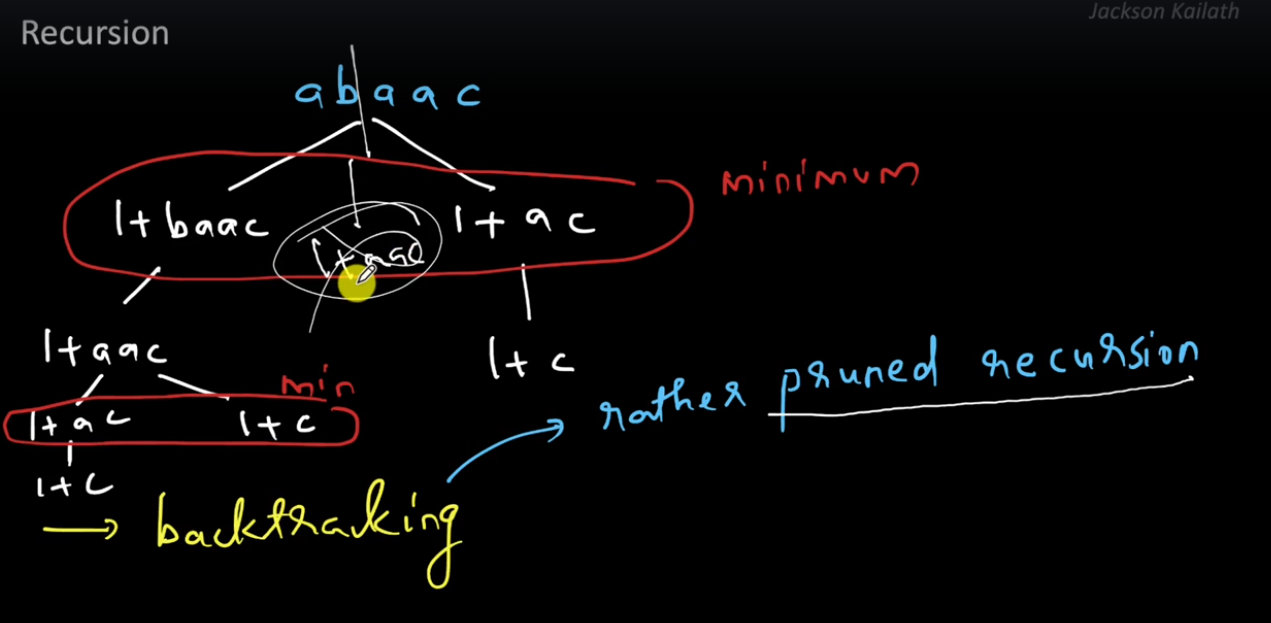 

# pallindrome partitioning 2 problem solving through Recursion-approach [complexity]:
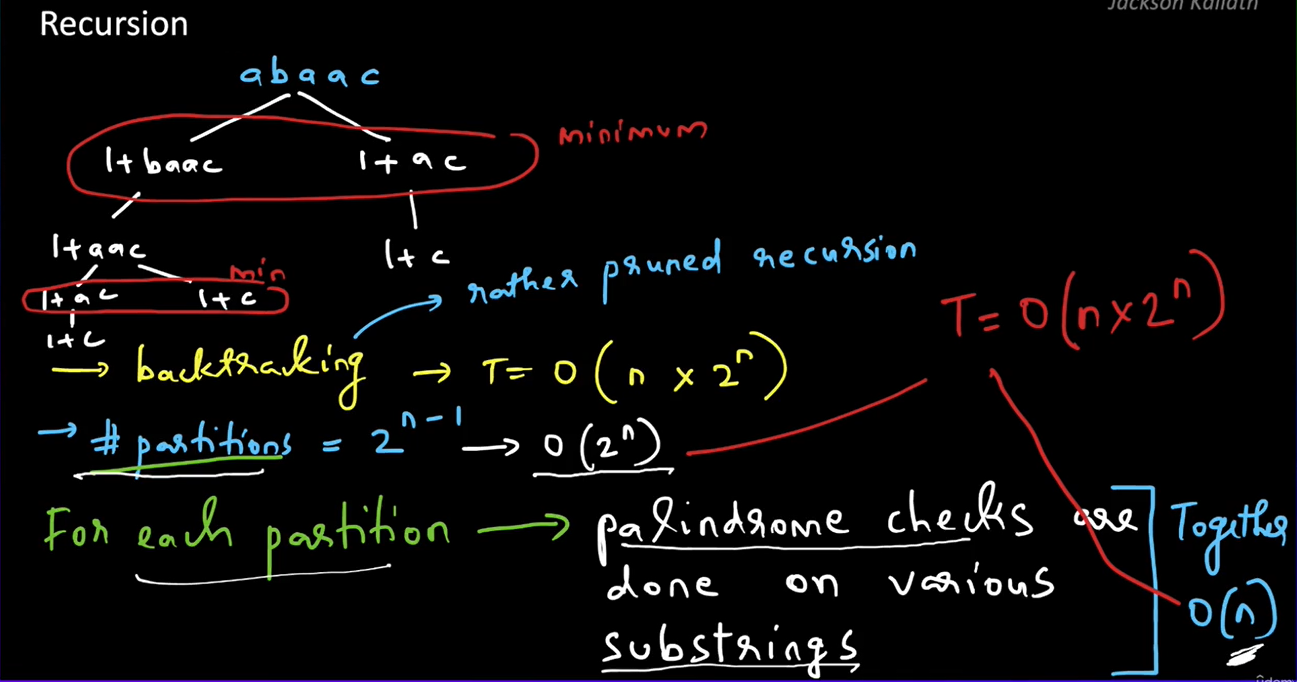

# pallindrome partitioning 2 problem solving through Recursion-approach [code-implementation]:
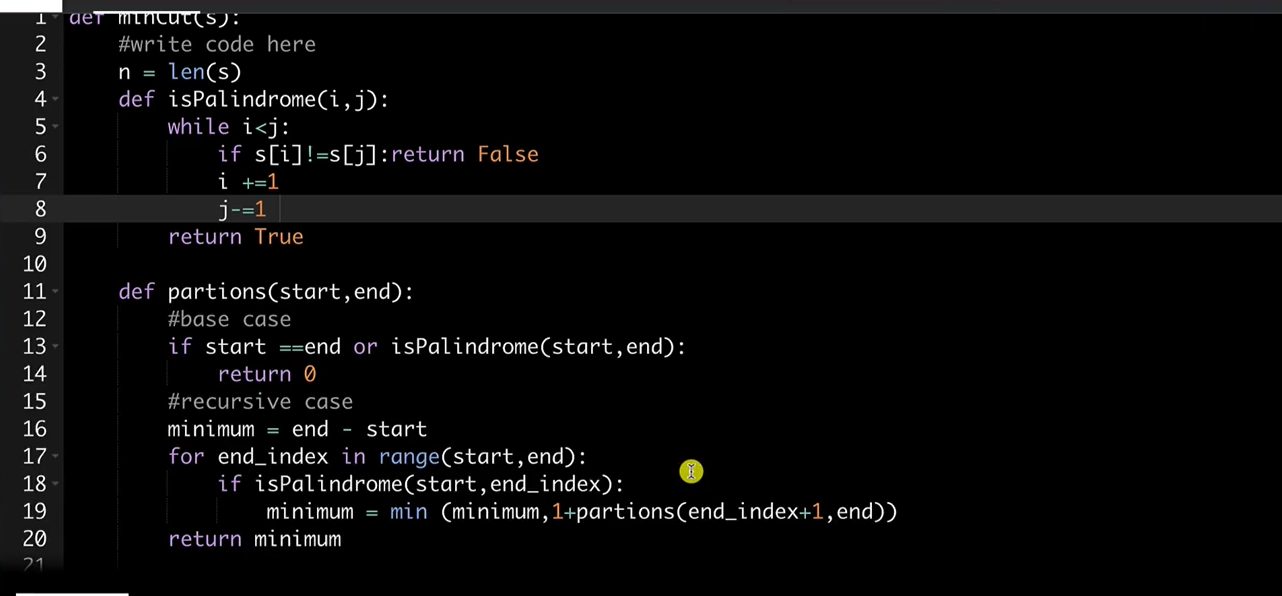


In [4]:
# pallindrome partitioning 2 (min-cuts) problem solving through Recursion-approach [code-implementation]:
#backtracking ( without dynamic programming)
def minCut(s):  # primary function taking string 
    def isPalindrome(start,end):  # function which checks substring passed(substring which starts from start-index upto end-index) 
                                                                              #as argument is pallindrome or not? 
        while start<end:  # untill unless start and end indexes not crossed each other  
            if s[start]!=s[end]:  # if first and last chars of passed substring not equal 
                return False  # then return false 
            start+=1  # increammenting start by 1
            end-=1    # decreammenting start by 1
        return True  # else : if first & last chars of passed substring is equal then return True 
    def partitions(start,end):   # partition function which takes start-index and end-index as arguments
        #base case: when start-index reached end of string ; means no more further char remaining to be partitioned or check 
        # or given string at hand already pallindromic; so zero min-partition required on that scenerio   
        if start ==end or isPalindrome(start,end):
            return 0
        minimumCuts = end - start    # initializing no. of min-cut as maximum number of partition possible (which's end -start always)
                                        # ex if string = 'abcde' indexes[0,1,2,3,4] = max partition possible here  = (a|b|c|d|e) = 4 partition (which's equal to end-start = 4-0 =4)
        for Upto_Index in range(start,end):  # upto index starts from start-index to the end-index
            if isPalindrome(start,Upto_Index):  # checking substring (which starts from start-index upto upto-index) is pallindrome or not ?
                minimumCuts = min(minimumCuts,1+partitions(Upto_Index+1,end)) # if its pallindrome then add '1' to further recursive_call for partition where start-index will be now upto_index+1.
              # then choosing minimum between last stored min-cut value  and current min-cut value  
        return minimumCuts    # return min-cut value 
    return partitions(0,len(s)-1)    # this recursive function initialised with start =0 and end = n-1 (where n is equal to length of given string )

#example usage :
st = "qveveq"  # q | v e v |  e | q      
print(minCut(st))  # min cut should be 3 

3


In [3]:
def minCut(s):
    def isPalindrome(start,end):
        while start<end:
            if s[start]!=s[end]:
                return False
            start+=1
            end-=1
        return True
    def partitions(start,end):
        #base case
        if start ==end or isPalindrome(start,end):
            return 0
        minimumCuts = end - start    
        for endIndex in range(start,end):
            if isPalindrome(start,endIndex):
                minimumCuts = min(minimumCuts,1+partitions(endIndex+1,end))
        return minimumCuts    
    return partitions(0,len(s)-1)    


# pallindrome partitioning 2 problem solving through Memoisation-approach:
### As we can see in this recursion tree for forming pallindromi-String by partitioning(min-cuts) has some overlapping subproblems,
### that's why here we're going to use the memoisation(top-dowm)approach by constructing 2-d dp_table to store min-cut values to corresponding start & end -indexes at 2-d dp_table. 
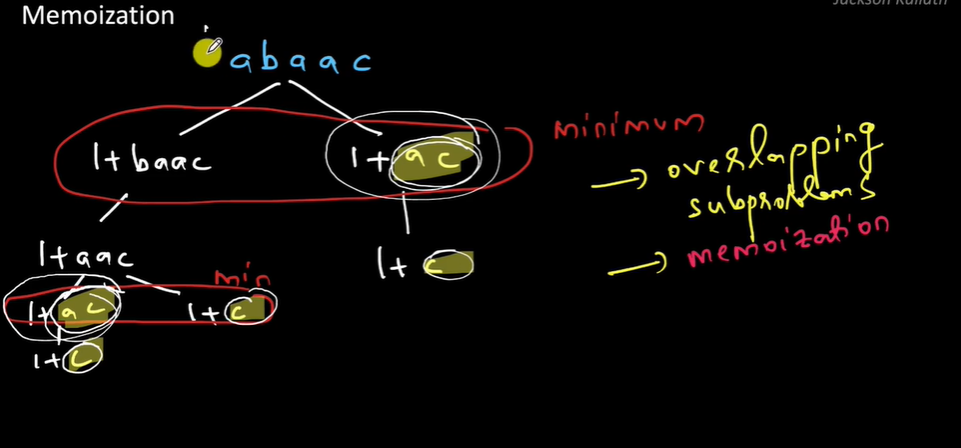
### before that we have to initially make 2-d dp_table(tabulation(gap-stategy)-approach) for check whether ongoing substring or passed substring is pallindrome or not ?
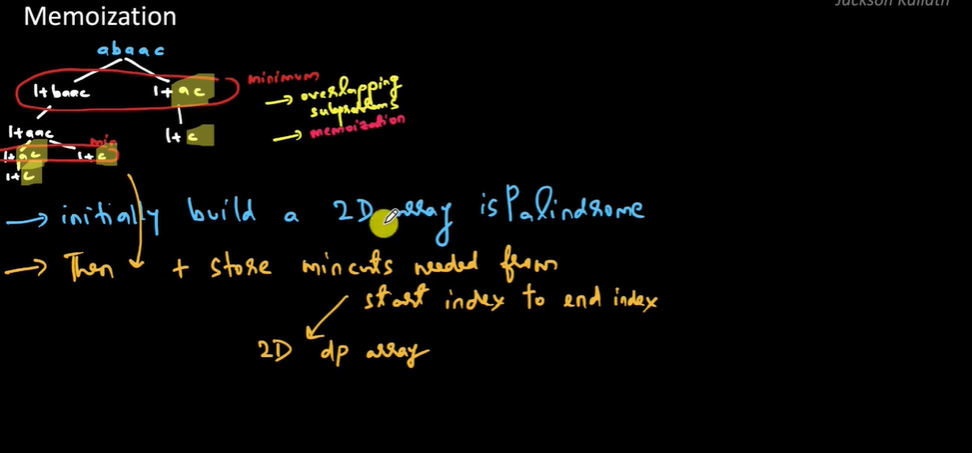

# pallindrome partitioning 2 problem solving through Memoisation-approach [complexity analysis]:
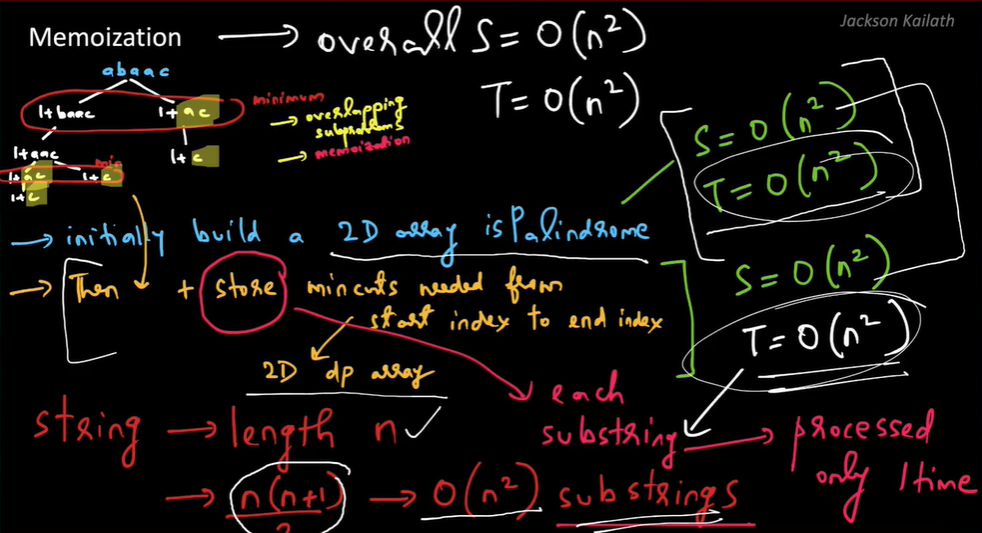

# pallindrome partitioning 2 problem solving through Memoisation-approach [code-implementation]:
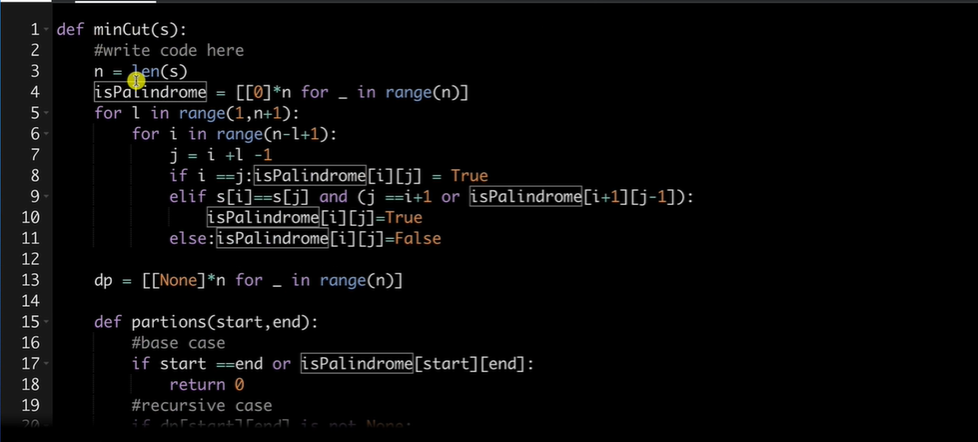
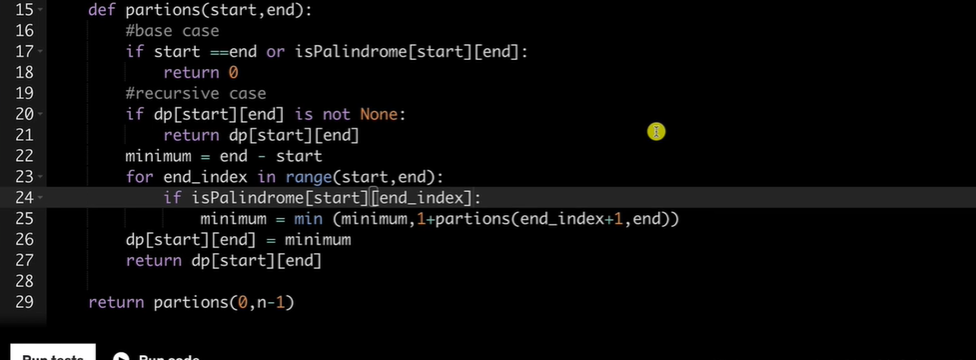


In [1]:
# pallindrome partitioning 2 problem solving through Memoisation-approach [code-implementation]  
# {Here we used 2-d dp_table(tabulation-gap-strategy approach) for finding-out whether passed string is pallindromic or not ?}:
def minCut(s):
    n = len(s)  #length of given string 
    #now we're implementing the 2-d dp_table for purpose of checking whether passed substring is pallindrome or not  
    dp_Palindrome = [[0]*n for _ in range(n)] #2-d dp_table we construct of dimesnion (n*n)  intialised all cells with 0
    
    for l in range(1,n+1): # length from 1 upto n
        for i in range(n-l+1): # i from 0 to n-l
            j = i+l -1 # for each instance of i; j = i+l -1 
            if i==j: # Longest-diagonal(median-diagonal): this diagonal where length equal to 1 ; means each and every char itself considered as substring 
                #and also considered Pallindrome certainly. 
                dp_Palindrome[i][j]=True
#last chars of curr-substring is equal then further check for substring in-betwwen these equal chars whether they're pallindromic substring or not (dp(i+1,j-1))
#As we already computed value for substring in-between equal chars also  [that's the values already filled-in at smaller length diagonals ; length = curr-length-2] 
        # if its the case of adjacent equal chars (j==i+1) then no need to check pallindromic substring for further chars in-between.
            elif s[i] == s[j] and (j==i+1 or dp_Palindrome[i+1][j-1]):
                dp_Palindrome[i][j] = True
            else:
                dp_Palindrome[i][j] = False    
    
    #now here we implementing the 2-d dp_table for purpose forming pallindromic substrings by minimum-cuts or partition            
    dp_minCuts = [[0]*n for _ in range(n)] #2-d dp_table we construct of dimesnion (n*n) intialised all cells with 0
    
    def partitions(start,end): # partition function which takes start-index and end-index as arguments
        #base case: when start-index reached end of string ; means no more further char remaining to be partitioned or check 
        # or given string at hand already pallindromic; so zero min-partition required on that scenerio   
        if start ==end or dp_Palindrome[start][end]:
            return 0
        #checking in memo_table that in 2-d dp_table(memo) solution/value of substring(subproblem) at corresponding indexes  existed or not ?
        if dp_minCuts[start][end] != 0:
            return dp_minCuts[start][end] #if existed then return solution/value of substring(subproblem) from corresponding indexes at 2-d dp_table(memo).  

        minimumCuts = end - start # initializing no. of min-cut as maximum number of partition possible (which's end - start always)
                                        # ex if string = 'abcde' indexes[0,1,2,3,4] = max partition possible here  = (a|b|c|d|e) = 4 partition (which's equal to end-start = 4-0 =4)    

        for uptoIndex in range(start,end):  # upto index starts from start-index to the end-index
            if dp_Palindrome[start][uptoIndex]: # checking substring (which starts from start-index upto upto-index) is pallindrome or not ?
                minimumCuts = min(minimumCuts,1+partitions(uptoIndex+1,end))# if its pallindrome then add '1' to further recursive_call for partition where start-index will be now upto_index+1. 
         # then choosing minimum between last stored min-cut value  and current min-cut value 
        dp_minCuts[start][end] = minimumCuts #storing solution/value(minimum-cuts) to corresponding indexes at 2-d dp_table   
         
        return dp_minCuts[start][end] # returning last updated or stored solution/value from corresponding indexes at 2-d dp_table   
    # this recursive function initialised with start =0 and end = n-1 (where n is equal to length of given string )
    return partitions(0,len(s)-1)    

#example usage :
st = "qveveq"  # q | v e v |  e | q      
print(minCut(st))  # min cut should be 3 

3


In [2]:
def minCut(s):
    n = len(s)
    isPalindrome = [[None]*n for _ in range(n)]
    minCuts = [[None]*n for _ in range(n)]
    
    for l in range(1,n+1):
        for i in range(n-l+1):
            j = i+l -1
            if i==j:
                isPalindrome[i][j]=True
            elif s[i] == s[j] and (j==i+1 or isPalindrome[i+1][j-1]):
                isPalindrome[i][j] = True
            else:
                isPalindrome[i][j] = False    

    def partitions(start,end):
        #base case
        if start ==end or isPalindrome[start][end]:
            return 0
        if minCuts[start][end] is not None:
            return minCuts[start][end]

        minimumCuts = end - start    

        for endIndex in range(start,end):
            if isPalindrome[start][endIndex]:
                minimumCuts = min(minimumCuts,1+partitions(endIndex+1,end))
        minCuts[start][end] = minimumCuts      
        return minCuts[start][end]    

    return partitions(0,len(s)-1)    